# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.shape

(27028, 69)

In [ ]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [ ]:
sinasc_raw['ORIGEM'].value_counts()

,count
ORIGEM,
1,27028


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [ ]:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_1.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [105]:
mun = sinasc_1.groupby('munResNome').median(numeric_only=True)
mun

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,24.0,25.5
Alvorada D'Oeste,25.0,31.0
Ariquemes,25.0,29.0
Buritis,25.0,28.5
Cabixi,26.0,35.5
Cacaulândia,25.0,33.5
Cacoal,26.0,30.0


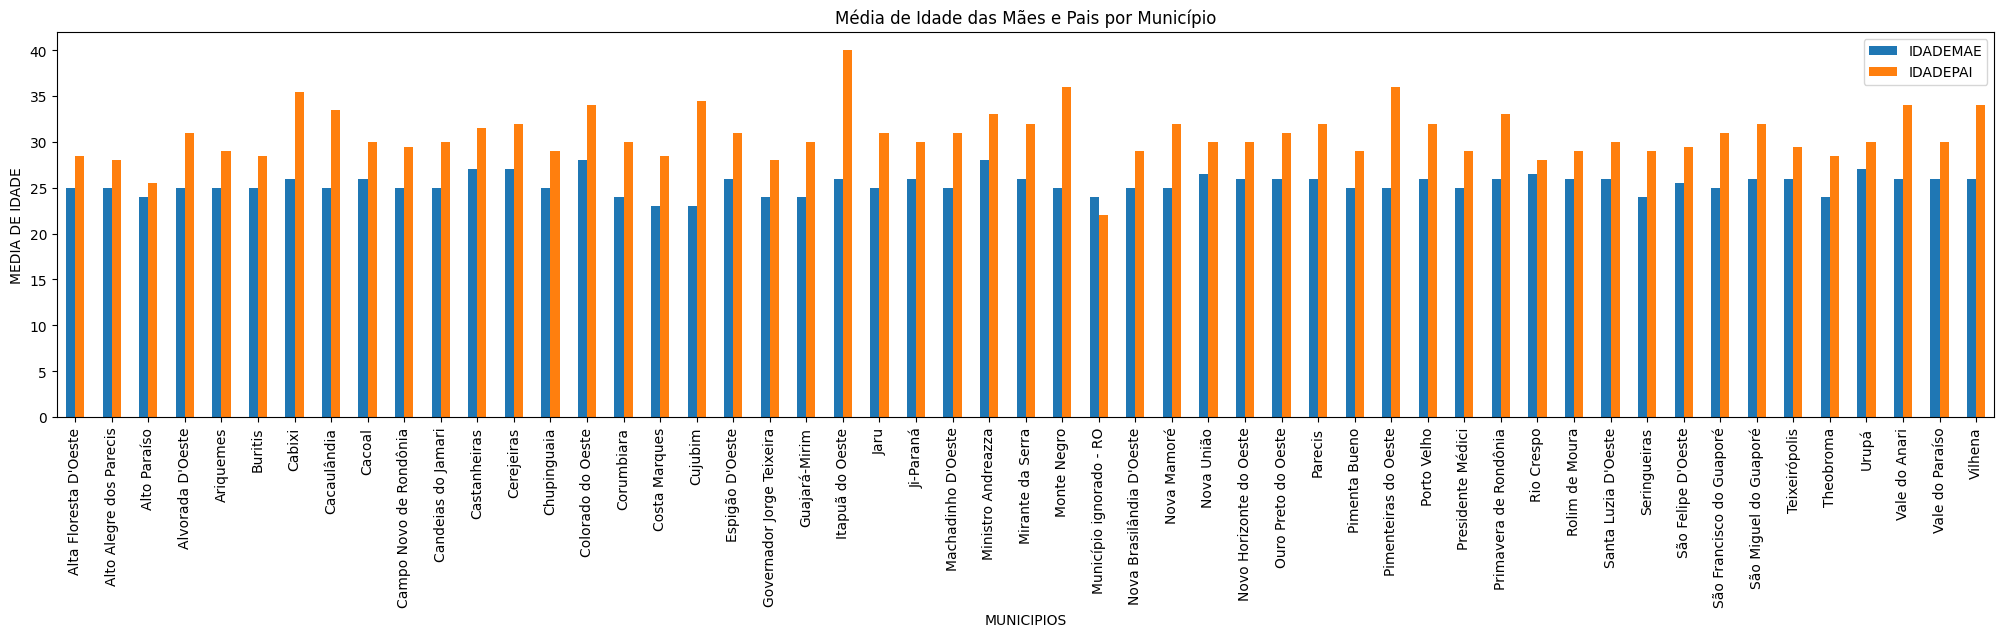

In [106]:
fig, ax = plt.subplots(figsize=[25,5])
mun.plot(kind='bar', ax=ax)
plt.xticks(rotation=90)
plt.xlabel('MUNICIPIOS');
plt.ylabel('MEDIA DE IDADE');
plt.title('Média de Idade das Mães e Pais por Município')
plt.show()

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [ ]:
sinasc_2 = sinasc_raw[['ESCMAE', 'DTNASC','SEXO','PESO']]

In [ ]:
pesoMeuNasc = sinasc_2[sinasc_2['DTNASC'] == '2019-02-26'].groupby(['ESCMAE','SEXO']).mean('PESO')
pesoMeuNasc

PESO
ESCMAE          SEXO                  
1 a 3 anos      Feminino   2741.000000
12 anos ou mais Feminino   3542.000000
                Masculino  3498.692308
4 a 7 anos      Feminino   3119.375000
                Masculino  3606.666667
8 a 11 anos     Feminino   3394.791667
                Masculino  3482.500000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [43]:
sinasc_3 = sinasc_raw[['ORIGEM','munResNome', 'IDADEMAE', 'IDADEPAI']]
menosB = sinasc_3.groupby('munResNome').agg({'ORIGEM': [('CONTAGEM','count')]})
menosB = menosB.rename_axis('Municipio')
menosB.sort_values(by=('ORIGEM', 'CONTAGEM'), ascending=True)

,ORIGEM
,CONTAGEM
Municipio,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64


In [44]:
sinasc_3[sinasc_3['munResNome'] == 'Castanheiras'].groupby('munResNome').agg({'ORIGEM': [('CONTAGEM','count')],
                                                                                         'IDADEMAE': [('MEDIA','mean'),('MINIMO','min'),('MAXIMO','max')],
                                                                                         'IDADEPAI': [('MEDIA','mean'),('MINIMO','min'),('MAXIMO','max')]})

ORIGEM  IDADEMAE                 IDADEPAI              
             CONTAGEM     MEDIA MINIMO MAXIMO      MEDIA MINIMO MAXIMO
munResNome                                                            
Castanheiras       32  27.28125     17     39  30.392857   17.0   43.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [47]:
sinasc_4 = sinasc_raw[['DTNASC','munResNome', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']]
sinasc_4.head()


,0
DTNASC,object
munResNome,object
QTDFILVIVO,float64
IDADEMAE,int64
IDADEPAI,float64


In [55]:
sinasc_4.loc[:, 'DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])

,0
DTNASC,object
munResNome,object
QTDFILVIVO,float64
IDADEMAE,int64
IDADEPAI,float64


In [56]:
sinasc_4.set_index('DTNASC', inplace=True)

/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [60]:
sinasc_4['MES'] = sinasc_4.index.month

/tmp/ipython-input-1387167171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_4['MES'] = sinasc_4.index.month


In [78]:
maisB = sinasc_4[sinasc_4['MES'] == 3].groupby('munResNome').agg({'MES': 'count',
                                                                  'QTDFILVIVO': [('MEDIA','mean'), ('MINIMO', min),('MAXIMO', max)],
                                                                  'IDADEMAE': [('MEDIA','mean'),('MINIMO','min'),('MAXIMO','max')],
                                                                  'IDADEPAI': [('MEDIA','mean'),('MINIMO','min'),('MAXIMO','max')]})
maisB = maisB.rename_axis('Municipio')
maisB.sort_values(by=('MES', 'count'), ascending=False)

/tmp/ipython-input-1205562497.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  maisB = sinasc_4[sinasc_4['MES'] == 3].groupby('munResNome').agg({'MES': 'count',
/tmp/ipython-input-1205562497.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  maisB = sinasc_4[sinasc_4['MES'] == 3].groupby('munResNome').agg({'MES': 'count',


MES QTDFILVIVO                 IDADEMAE         \
                          count      MEDIA MINIMO MAXIMO      MEDIA MINIMO   
Municipio                                                                    
Porto Velho                 744   1.295056    0.0    9.0  26.596774     14   
Ji-Paraná                   188   0.828877    0.0    4.0  25.377660     13   
Vilhena                     148   0.979592    0.0    5.0  26.412162     16   
Ariquemes                   141   1.064748    0.0    4.0  25.304965     14   
Cacoal                      133   0.969697    0.0    7.0  26.466165     15   
Jaru                         80   1.025641    0.0    5.0  26.550000     14   
Guajará-Mirim                75   1.534247    0.0    8.0  26.333333     14   
Rolim de Moura               69   0.724638    0.0    5.0  27.594203     18   
Ouro Preto do Oeste          67   1.014925    0.0    5.0  25.522388     14   
Pimenta Bueno                62   0.836066    0.0    4.0  25.177419     14   
Buritis                      59   1.421053    0.0    4.0  25.406780     15   
Nova Mamoré                  53   1.360000    0.0    6.0  24.207547     15   
Machadinho D'Oeste           44   1.000000    0.0    6.0  26.295455     14   
Espigão D'Oeste              44   1.386364    0.0    6.0  25.409091     16   
São Miguel do Guaporé        41   1.000000    0.0    4.0  26.365854     14   
Candeias do Jamari           33   1.250000    0.0    4.0  24.363636     17   
São Francisco do Guaporé     31   1.161290    0.0    6.0  25.677419     14   
Alta Floresta D'Oeste        31   0.903226    0.0    4.0  26.193548     18   
Presidente Médici            29   0.724138    0.0    3.0  25.344828     14   
Costa Marques                24   1.208333    0.0    4.0  25.666667     15   
Alto Paraíso                 22   1.285714    0.0    3.0  24.818182     11   
Alvorada D'Oeste             22   1.000000    0.0    3.0  25.772727     15   
Nova Brasilândia D'Oeste     20   0.947368    0.0    3.0  26.650000     20   
Monte Negro                  20   0.700000    0.0    3.0  25.650000     15   
Colorado do Oeste            19   1.000000    0.0    4.0  27.736842     17   
Seringueiras                 19   1.000000    0.0    2.0  25.473684     18   
Chupinguaia                  18   1.055556    0.0    4.0  26.277778     13   
Cujubim                      17   1.294118    0.0    5.0  24.882353     16   
Cerejeiras                   16   0.875000    0.0    2.0  27.062500     17   
Urupá                        14   0.928571    0.0    2.0  26.357143     18   
Campo Novo de Rondônia       13   1.285714    0.0    2.0  22.153846     17   
Vale do Paraíso              13   0.583333    0.0    2.0  23.615385     16   
Corumbiara                   12   0.909091    0.0    3.0  24.083333     18   
Vale do Anari                11   0.818182    0.0    2.0  24.545455     19   
Alto Alegre dos Parecis      10   0.888889    0.0    2.0  25.100000     17   
Cacaulândia                  10   1.200000    0.0    4.0  26.200000     18   
Governador Jorge Teixeira    10   0.555556    0.0    2.0  24.500000     16   
Rio Crespo                    9   1.000000    0.0    3.0  28.888889     20   
Mirante da Serra              9   1.000000    0.0    2.0  24.888889     16   
Itapuã do Oeste               8   1.285714    0.0    3.0  25.625000     17   
Theobroma                     8   1.125000    0.0    2.0  26.875000     20   
Nova União                    7   0.571429    0.0    1.0  23.428571     16   
Santa Luzia D'Oeste           7   0.428571    0.0    2.0  23.285714     18   
Cabixi                        6   0.833333    0.0    3.0  28.000000     17   
Parecis                       6   1.833333    1.0    5.0  28.000000     20   
Pimenteiras do Oeste          6   1.000000    0.0    2.0  23.000000     19   
Ministro Andreazza            6   1.166667    0.0    3.0  27.166667     19   
Novo Horizonte do Oeste       5   1.200000    1.0    2.0  29.000000     19   
São Felipe D'Oeste            5   0.000000    0.0 

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [ ]:
sinasc_raw.dtypes

,0
ORIGEM,int64
CODESTAB,float64
CODMUNNASC,int64
LOCNASC,int64
IDADEMAE,int64
...,...
munResUf,object
munResLat,float64
munResLon,float64
munResAlt,float64


In [ ]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [ ]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [110]:
sinasc_5 = sinasc_raw[['PARTO', 'IDADEMAE', 'GESTACAO', 'APGAR5']]

In [111]:
sinasc_5

,PARTO,IDADEMAE,GESTACAO,APGAR5
0,Cesáreo,19,37 a 41 semanas,10.0
1,Cesáreo,29,37 a 41 semanas,9.0
2,Cesáreo,37,37 a 41 semanas,10.0
3,Cesáreo,30,37 a 41 semanas,10.0
4,Cesáreo,30,37 a 41 semanas,10.0
...,...,...,...,...
27023,Cesáreo,32,32 a 36 semanas,9.0
27024,Vaginal,19,37 a 41 semanas,9.0
27025,Cesáreo,24,37 a 41 semanas,10.0
27026,Vaginal,21,32 a 36 semanas,9.0


In [159]:
partoporidade=sinasc_5.groupby(['GESTACAO','PARTO']).agg({'APGAR5': 'mean'})
partoporidade

APGAR5
GESTACAO            PARTO            
22 a 27 semanas     Cesáreo  7.869565
                    Vaginal  6.131148
28 a 31 semanas     Cesáreo  8.133333
                    Vaginal  7.805556
32 a 36 semanas     Cesáreo  8.863023
                    Vaginal  8.995984
37 a 41 semanas     Cesáreo  9.205059
                    Vaginal  9.264843
42 semanas e mais   Cesáreo  9.183824
                    Vaginal  9.268966
Menos de 22 semanas Cesáreo  8.333333
                    Vaginal  5.250000

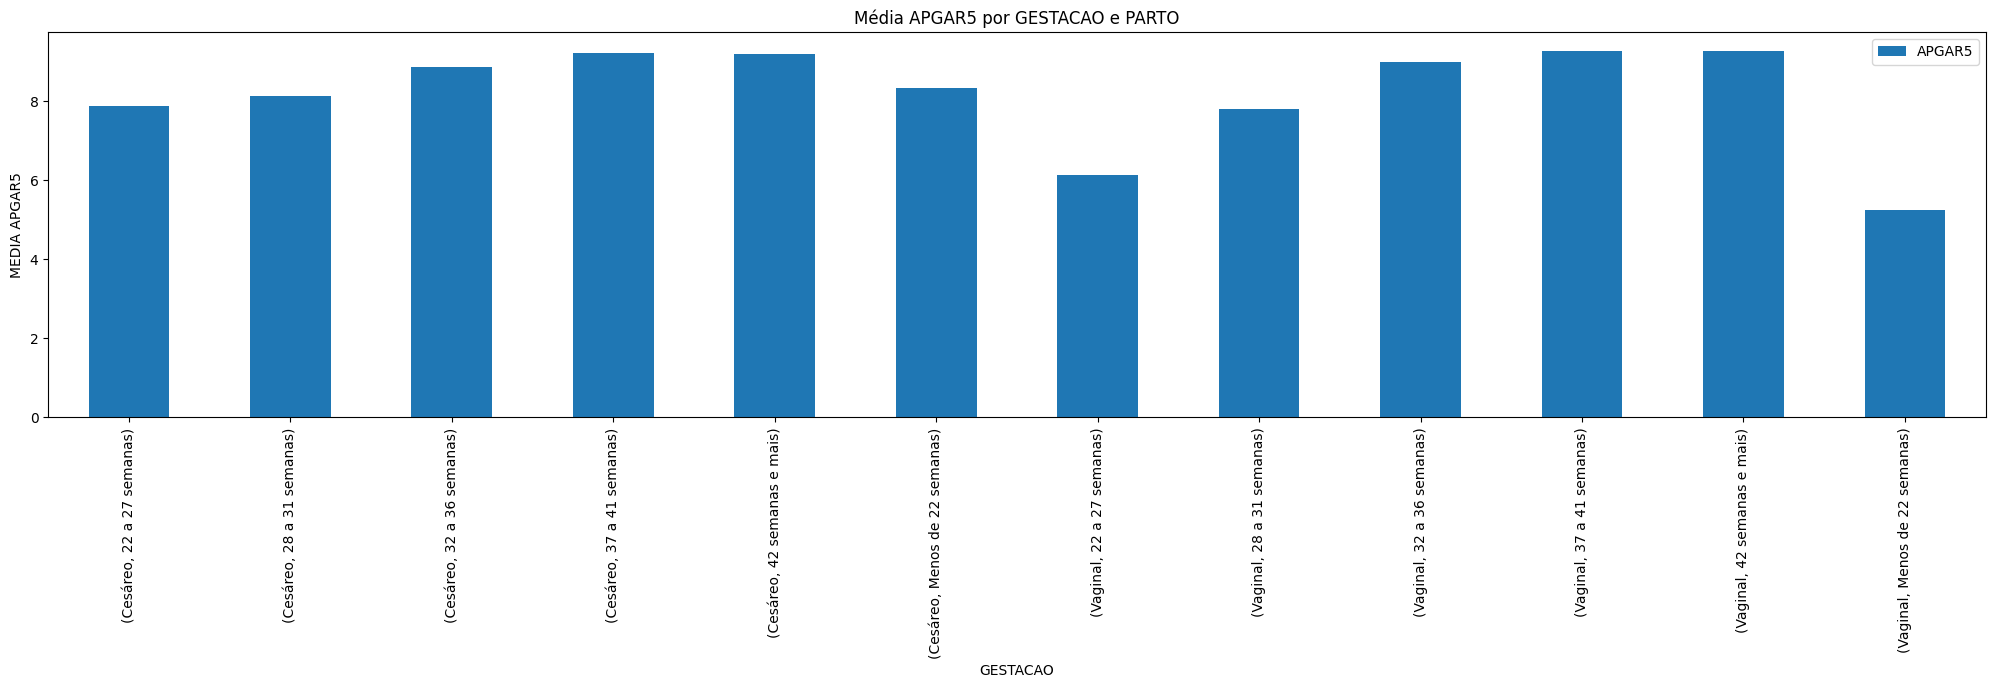

In [158]:
fig, ax = plt.subplots(figsize=[25,5])
partoporidade.plot(kind='bar', ax=ax)
plt.xticks(rotation=90)
plt.xlabel('GESTACAO');
plt.ylabel('MEDIA APGAR5');
plt.title('Média APGAR5 por GESTACAO e PARTO')
plt.show()

In [160]:
#De 22 até 31 semanas a Média de APGAR5 é mais no parto Cesáreo, a partir de 32 semanas a Média de AGPAR5 é maior no parto Vaginal